In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./netflix.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [6]:
#Task. 1) Is there any Duplicate Record in this dataset ? If yes, then remove the dupl
df.duplicated().sum()
df.drop_duplicates(inplace = True)

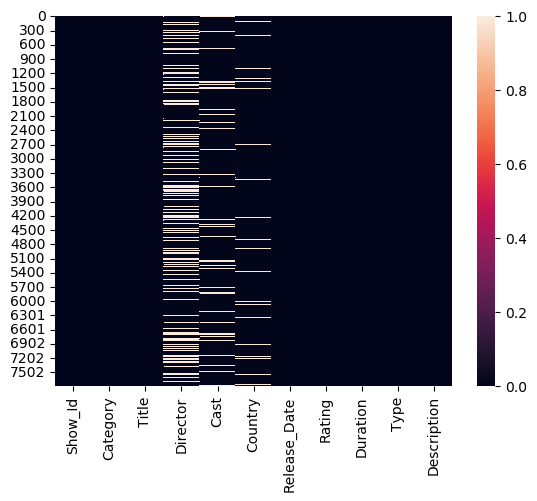

In [7]:
#Task. 2) Is there any Null Value present in any column ? Show with Heat-map.
sns.heatmap(df.isnull())
plt.show()

In [8]:
#Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show
df[df["Title"] == "House of Cards"]
#df[df["Title"].str.contains("House of Cards")]
#df[df["Title"].isin(["House of Cards"])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


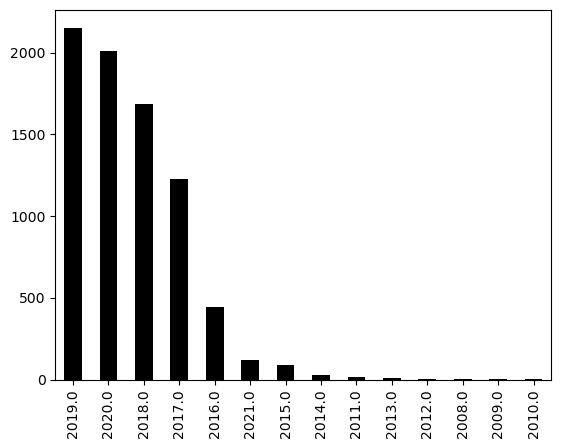

In [9]:
#Q. 2) In which year the highest number of the TV Shows & Movies were released ? Show
df["Release_Date"] = pd.to_datetime(df.Release_Date)
df.Release_Date.dt.year.value_counts().plot(kind = "bar", color = "black")
plt.show()

In [10]:
#Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.
df.Category.value_counts()

Movie      5377
TV Show    2410
Name: Category, dtype: int64

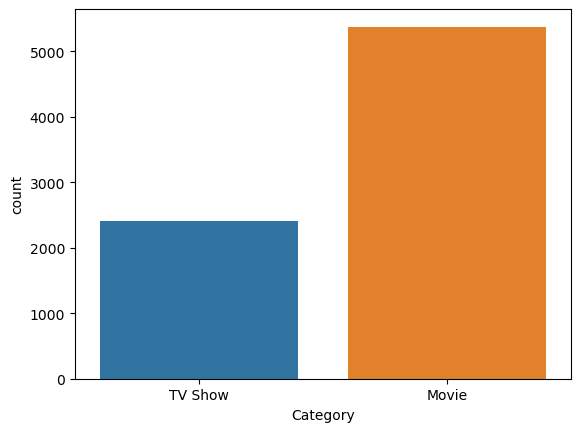

In [11]:
sns.countplot(x = df.Category)
plt.show()

In [12]:
#Q. 4) Show all the Movies that were released in year 2000.
df[(df.Release_Date.dt.year == 2000) & (df.Category == "Movie")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [13]:
#Q. 5) Show only the Titles of all TV Shows that were released in Germany only.
df[(df.Country == "Germany") & (df["Category"] == "TV Show")]["Title"]

213                           A Perfect Crime
672                            Babylon Berlin
731                                Barbarians
931                                Biohackers
1277                                  Charité
1539                        Criminal: Germany
1797                           Dogs of Berlin
2261    Frank Elstner: Just One Last Question
2774                          Holiday Secrets
2849          How to Sell Drugs Online (Fast)
4388                       Nailed It! Germany
4546                     NSU German History X
4711                           Over Christmas
4829                                  Perfume
5623                         Sing On! Germany
5659                                 Skylines
6575                            The Last Word
7357                               Unorthodox
7502                          We Are the Wave
Name: Title, dtype: object

In [14]:
#Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netf
df["Director"].value_counts(ascending = False)[0:10]
#df["Director"].value_counts(ascending = False).head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

In [19]:
#Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is UK
df[(df["Category"] == "Movie") & (df["Type"] == "Comedies") | (df["Country"] == "United Kingdom")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,2019-11-01,TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist..."
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik..."
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...
...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,2017-08-01,TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,2019-02-01,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali..."
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,2020-03-18,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc..."
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,2017-12-31,TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...


In [21]:
#Q. 9) What are the different Ratings defined by Netflix ?
#df.Rating.unique()
df.Rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: Rating, dtype: int64

In [30]:
##Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?
#df[(df.Rating == "TV-14") & (df.Category == "Movie") & (df.Country == "Canada")].shape
len(df[(df.Rating == "TV-14") & (df.Category == "Movie") & (df.Country == "Canada")])
#df[(df.Rating == "TV-14")& (df.Category == "Movie") & (df.Country == "Canada")].count
#df[(df.Rating == "TV-14")& (df.Category == "Movie") & (df.Country == "Canada")]

11

In [39]:
##Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?
#df[(df.Release_Date.dt.year >= 2018) & (df.Rating == "R") & (df.Category == "TV Show")]
#len(df[(df.Release_Date.dt.year >= 2018) & (df.Rating == "R") & (df.Category == "TV Show")])
df[(df.Release_Date.dt.year >= 2018) & (df.Rating == "R") & (df.Category == "TV Show")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,2019-04-25,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...


In [41]:
#Q. 10) What is the maximum duration of a Movie/Show on Netflix ?
df[["minutes", "unit"]] = df["Duration"].str.split(" ",expand = True)
df.minutes.astype(int).groupby(df.Category).max()

Category
Movie      312
TV Show     16
Name: minutes, dtype: int64

In [42]:
#Q. 11) Which individual country has the Highest No. of TV Shows ?
df[df["Category"] == "TV Show"]["Country"].value_counts()

United States                                                705
United Kingdom                                               204
Japan                                                        157
South Korea                                                  147
India                                                         71
                                                            ... 
Canada, United States, United Kingdom, France, Luxembourg      1
United States, Italy                                           1
Chile, Italy                                                   1
Canada, United Kingdom                                         1
United States, France, South Korea, Indonesia                  1
Name: Country, Length: 183, dtype: int64

In [44]:
#Q. 12) How can we sort the dataset by Year ?
df.sort_values(by = "Release_Date", ascending = False)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,minutes,unit
1673,s1674,Movie,Death of Me,Darren Lynn Bousman,"Maggie Q, Luke Hemsworth, Alex Essoe, Ingkarat...","United States, Thailand",2021-01-16,R,94 min,Horror Movies,"With no memory of the previous night, a vacati...",94,min
5060,s5060,Movie,Radium Girls,"Lydia Dean Pilcher, Ginny Mohler","Joey King, Abby Quinn, Cara Seymour, Scott She...",United States,2021-01-16,TV-14,103 min,"Dramas, Independent Movies",When the women at a radium factory begin to fa...,103,min
205,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States",2021-01-16,PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b...",108,min
1832,s1833,Movie,Double Dad,Cris D'Amato,"Maisa Silva, Eduardo Moscovis, Marcelo Médici,...",Brazil,2021-01-15,TV-G,105 min,"Children & Family Movies, Comedies, Dramas","While her mom is away, a teen sneaks out of th...",105,min
4710,s4711,Movie,Outside the Wire,Mikael Håfström,"Anthony Mackie, Damson Idris, Emily Beecham, M...",NaN,2021-01-15,R,116 min,Action & Adventure,"In the near future, a drone pilot sent into a ...",116,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,2,Seasons
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",3,Seasons
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",4,Seasons
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",13,Seasons


In [45]:
#Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is TV show
df[(df["Category"] == "Movie") & (df["Type"] == "Dramas") | (df["Category"] == "TV Show")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,minutes,unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Seasons
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123,min
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,1,Season
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,119,min
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",1,Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7769,s7768,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",1,Season
7777,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2020-08-14,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,1,Season
7779,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2,Seasons
7781,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019-11-26,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,1,Season
